# Spectral Clustering


Both spectral and hierarchical clustering depend on computing how "similar" datapoints in a dataset are (using some measure of similarity). Both methods then try to group "similar" datapoints into common clusters.

Spectral clustering uses the similarity matrix formed from the datapoints' similarity measures and the eigenvalues of said matrix to form clusters. If a random walker were jumping from datapoint to datapoint based on how "similar" those datapoints were, the clusters represent collections of datapoints the random walker spends considerable time in.

## Clustering the Iris Dataset

I will demonstrate using spectral clustering for the iris dataset. I first load in that dataset.

In [1]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
iris_obj = load_iris()
iris_data = iris_obj.data
species = iris_obj.target
iris_data[:5,:]

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2]])

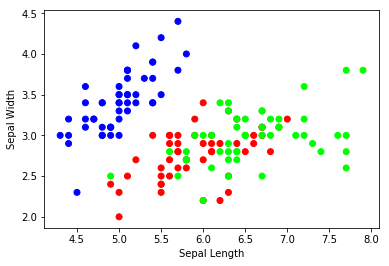

In [3]:
plt.scatter(iris_data[:, 0], iris_data[:, 1], c=species, cmap=plt.cm.brg)
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.show()

Next I import the `SpectralClustering` object to perform spectral clustering, and then apply the method.

In [4]:
from sklearn.cluster import SpectralClustering

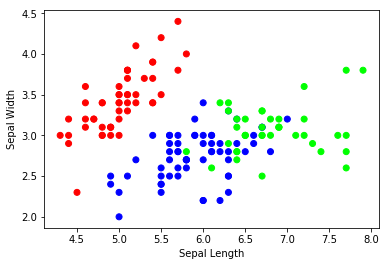

In [15]:
irisclust = SpectralClustering(n_clusters=3,   # Three clusters
                               affinity="rbf")    # "Closeness" is defined using Gaussian kernel
irisclust = irisclust.fit(iris_data)

# Visualizing the clustering
plt.scatter(iris_data[:, 0], iris_data[:, 1], c=irisclust.labels_, cmap=plt.cm.brg)
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.show()

Choosing different affinity schemes yields different results. Like with hierarchical clustering, spectral clustering produces nice results but does not allow for "prediction". That is, it doesn't take new , never-before-seen datapoints and assign them to a cluster.

## Clustering Headlines

Let's cluster the headlines dataset, as we did before with hierarchical clustering. While hierarchical clustering requires a distance matrix, spectral clustering requires a similarity matrix.

The code below was explained in a previous video.

In [16]:
import pandas as pd
from nltk import ngrams
import numpy as np

In [17]:
headlines = pd.read_csv("HNHeadlines.txt", header=None, index_col=0).iloc[:, 0]
headline_sets = [set(''.join(u) for u in ngrams(h.lower(), 3)) for h in headlines]
sims = np.zeros((len(headlines), len(headlines)))    # Will contain the affinity matrix
for i in range(len(headlines)):
    for j in range(i, len(headlines)):
        h1, h2 = headline_sets[i], headline_sets[j]
        js = len(h1.intersection(h2))/len(h1.union(h2))    # Compute the Jaccard similarity for the two documents
        sims[i,j] = sims[j,i] = js    # Store the Jaccard similarity in the appropriate entries of the matrix

headlines

0
0      Uber Co-Founder Travis Kalanick Said to Plan S...
1                         Update on Meltdown and Spectre
2      Intel Issues Updates to Protect Systems from S...
3       Where Pot Entrepreneurs Go When the Banks Say No
4                      Announcing the OpenWrt/LEDE merge
5                 Transpile Java Bytecode to WebAssembly
6                                     iMac Pro's T2 chip
7      Productivity in 2017: analyzing 225 million ho...
8      About speculative execution vulnerabilities in...
9      “My ten hour white noise video now has five co...
10                Site Isolation – The Chromium Projects
11     Xerox Alto zero-day: cracking disk password pr...
12                     The Best Things and Stuff of 2017
13     More details about mitigations for the CPU Spe...
14                     In pursuit of Otama's tone (2017)
15            Show HN: PAST, a secure alternative to JWT
16     Ink/stitch: an Inkscape extension for machine ...
17     Texttop – An interacti

I also plan to assess the quality of the resulting clustering using a silhouette plot.

In [18]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, silhouette_samples
%matplotlib inline

def silhouette_plot(data, labels, metric="euclidean", xticks = True):
    """Creates a silhouette plot given a dataset and the labels corresponding to cluster assignment, and reports the
       average silhouette score"""
    silhouette_avg = silhouette_score(data, labels,
                                      metric=metric)    # The average silhouette score over the entire sample
    sample_silhouette_values = silhouette_samples(data, labels,
                                                  metric=metric)    # The silhouette score of each individual data point
    
    # This loop creates the silhouettes in the silhouette plot
    y_lower = 10    # For space between silhouettes
    for k in np.unique(labels):
        cluster_values = sample_silhouette_values[labels == k]
        cluster_values.sort()
        nk = len(cluster_values)
        y_upper = y_lower + nk
        color = cm.spectral(float(k) / len(np.unique(labels)))
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, cluster_values,
                          facecolor=color, edgecolor=color)
        plt.text(-0.05, y_lower + 0.5 * nk, str(k))
        y_lower = y_upper + 10
    
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")
    if xticks:
        plt.xticks([-0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
    plt.yticks([])
    plt.xlabel("Silhouette Score")
    plt.ylabel("Cluster")
    plt.show()
    
    print("The average silhouette score is", silhouette_avg)

Now we can perform the clustering.

In [19]:
headlineclust = SpectralClustering(n_clusters=4, affinity="precomputed")
hclusters = headlineclust.fit_predict(sims)
hclusters

array([0, 3, 1, 0, 0, 1, 1, 1, 3, 3, 3, 1, 0, 3, 3, 2, 3, 3, 0, 1, 3, 3, 1,
       3, 3, 3, 0, 3, 1, 3, 3, 3, 2, 3, 3, 1, 3, 3, 3, 3, 1, 0, 1, 1, 0, 3,
       3, 1, 0, 3, 3, 3, 3, 0, 3, 1, 3, 1, 1, 0, 1, 1, 1, 1, 2, 1, 1, 0, 1,
       3, 3, 3, 3, 1, 3, 3, 3, 2, 1, 3, 0, 2, 1, 3, 3, 1, 3, 2, 3, 0, 1, 1,
       1, 1, 3, 3, 3, 0, 0, 3, 1, 0, 0, 2, 1, 0, 3, 1, 3, 3, 0, 3, 1, 0, 3,
       1, 1, 2, 0, 0, 3, 3, 2, 0, 3, 3, 1, 2, 1, 0, 1, 0, 2, 0, 0, 1, 3, 1,
       0, 1, 1, 3, 2, 1, 2, 1, 3, 1, 3, 3, 3, 3, 3, 1, 3, 0, 3, 0, 3, 0, 3,
       3, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 0, 1, 3, 3, 3, 1, 3, 3, 2, 0, 1, 3,
       0, 1, 3, 3, 3, 3, 1, 0, 3, 0, 0, 0, 2, 3, 0, 1, 0, 3, 0, 1, 1, 3, 1,
       2, 1, 2, 3, 1, 2, 1, 3, 0, 3, 0, 3, 2, 3, 3, 1, 3, 1, 3, 1, 2, 3, 0,
       2, 3, 2, 3, 0, 2, 1, 2, 3, 3, 1, 1, 1, 1, 3, 1, 1, 3, 0, 2, 2, 3, 0,
       0, 3, 1, 0, 3, 1, 1, 0, 3, 3, 2, 3, 1, 3, 0, 3, 2, 3, 1, 1, 1, 3, 1,
       3, 3, 1, 2, 1, 3, 1, 1, 3, 3, 0, 3, 3, 3, 0, 1, 2, 1, 1, 3, 3, 3, 1,
       3])

How well did the algorithm do?

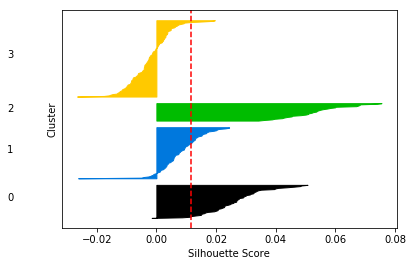

The average silhouette score is 0.0115152417981


In [20]:
silhouette_plot(1 - sims, hclusters, metric="precomputed", xticks=False)

In [21]:
headlines[hclusters==3]

0
1                         Update on Meltdown and Spectre
8      About speculative execution vulnerabilities in...
9      “My ten hour white noise video now has five co...
10                Site Isolation – The Chromium Projects
13     More details about mitigations for the CPU Spe...
14                     In pursuit of Otama's tone (2017)
16     Ink/stitch: an Inkscape extension for machine ...
17     Texttop – An interactive X Linux desktop rende...
20     Theo de Raadt, 2007: “some [Intel] bugs will b...
21              Wi-Fi startup Eero lays off 30 employees
23     FCC Chairman Ajit Pai canceled his appearance ...
24     Algorithm efficiency comes from problem inform...
25     How and why we teach non-engineers to use GitH...
27                        Science and Linguistics (1940)
29     XPS 13 developer edition 7th generation available
30     How an A.I. ‘Cat-And-Mouse Game’ Generates Bel...
31                             GitHub acquires AppCanary
33     What If Sugar Is Worse

In [22]:
headlines[hclusters==2]

0
15            Show HN: PAST, a secure alternative to JWT
32     Show HN: An illustration of Web Developer tool...
64     Show HN: Hourly updated list of subdomains fro...
77     Show HN: HNNotify – Get emailed when a users r...
81                        Show HN: Basic GPU path tracer
87     Ask HN: Could JavaScript be moved to a higher ...
103     Show HN: HNCute, a pretty pink Hacker News theme
117        Ask HN: Do you use State Machines for UI dev?
122                Ask HN: Who is hiring? (January 2018)
127                Show HN: React-Redux-Sass Starter Kit
132         Ask HN: Is commercial desktop software dead?
142     Show HN: Easy magic-link authentication – Cierge
144    Show HN: Sapper.js – towards a better web app ...
180    Ask HN: What are some good resources to learn ...
196    Show HN: Cipher – Mobile Ethereum Web3 DApp Br...
207    Show HN: VidDistill – Automated YouTube Video ...
209            Ask HN: Elm vs. React vs. Vue.js in 2018?
212    Show HN: Mask R-CNN Ne

The clustering is not necessarily bad; at least one cluster seems reasonable. That said, it's not great either, according to the silhouette plot.